Todo el proceso de experimentar con el dataset segment

In [1]:
from demo_utils.demo0 import Demo0
from demo_utils.demo3 import Demo3
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from demo_utils.general import get_data
import warnings
d = Demo0()
testing_dataset = 'segment'
run_mode = False

In [2]:
warnings.filterwarnings('ignore')
# warnings.filterwarnings('once')
#warnings.filterwarnings(action='once')

# Con los modelos simples

Ver cómo se comportan los modelos simples con este dataset

Habría que encontrar los mejores hiper-parámetros para cada uno de ellos

Los híper-parámetros que tienen son:

**Decision Tree**:
- max_depth
- min_samples_split
- min_samples_leaf
- min_weight_fraction_leaf
- max_leaf_nodes
- min_impurity_decrease

**Logit**:
- C

**Linear SVM**:
- C

### HíperParámetros con DecisionTree

In [4]:
if run_mode:
    tuned_parameters = [{
        'max_depth': [10, 100, 1000, 10000, 100000, None],
        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
        'min_samples_leaf': [1, 2, 3, 4],
        'min_weight_fraction_leaf': [.0, .1, .3],
        'max_leaf_nodes': [10, 50, 100, 1000, None],
        'min_impurity_decrease': [.0, .2, .6],
    }]
    clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=10)
    data = get_data(testing_dataset)
    data_train = data['data_train']
    data_test = data['data_test']
    target_train = data['target_train']
    target_test = data['target_test']

    clf.fit(data_train, target_train)
    dt_best_params = clf.best_params_
    print('DecisionTree best params.')
    print(dt_best_params)

- **max_depth**: 100
- **max_leaf_nodes**: 1000
- **min_impurity_decrease**: 0.0
- **min_samples_leaf**: 1
- **min_samples_split**: 3
- **min_weight_fraction_leaf**: 0.0

### HíperParámetros con Logit

In [5]:
if run_mode:    
    tuned_parameters = [{
        'C': [.1, .5, 1, 5, 10, 100, 500, 1000, 10000, 1000000],
    }]
    clf = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs'),
                       tuned_parameters, cv=10, iid=False)
    data = get_data(testing_dataset)
    data_train = data['data_train']
    data_test = data['data_test']
    target_train = data['target_train']
    target_test = data['target_test']

    clf.fit(data_train, target_train)
    print('LogisticRegression best params.')
    logit_best_params = clf.best_params_
    print(logit_best_params)

- **C**: 1000

(Tener en cuenta que da un convergence warning, que aquí se ignora)

### HíperParámetros con LinearSVC

In [6]:
if run_mode:    
    tuned_parameters = [{
        'C': [.1, .5, 1, 5, 10, 100],
    }]
    clf = GridSearchCV(LinearSVC(), tuned_parameters, cv=10, iid=False)
    data = get_data(testing_dataset)
    data_train = data['data_train']
    data_test = data['data_test']
    target_train = data['target_train']
    target_test = data['target_test']

    clf.fit(data_train, target_train)
    print('LinearSVC best params.')
    linear_svc_best_params = clf.best_params_
    print(linear_svc_best_params)

- **C**: 5

In [7]:
if not run_mode:    
    # Para no tener que ejecutar el CV otra vez
    dt_best_params = {
        'max_depth': 100,
        'max_leaf_nodes': 1000,
        'min_impurity_decrease': 0.0,
        'min_samples_leaf': 1,
        'min_samples_split': 3,
        'min_weight_fraction_leaf': 0.0
    }
    logit_best_params = {'C': 1000}
    linear_svc_best_params = {'C': 5}

In [8]:
data = {
    'dts_name': testing_dataset,
    'dts_size': 1000,
    'features_range': (30, 100),
    'rbfsampler_gamma': 0.2,
    'nystroem_gamma': 0.2,
    'hparams': {
        'dt': dt_best_params,
        'logit': logit_best_params,
        'linearsvc': linear_svc_best_params,
    },
    'models': [
        {'model_name': 'dt',
         'sampler_name': 'identity',
         'box_type': 'none',
         'n_estim': None,
         'pca': False,
         'pca_first': False
        },
        {'model_name': 'logit',
         'sampler_name': 'identity',
         'box_type': 'none',
         'n_estim': None,
         'pca': False,
         'pca_first': False
        },
        {'model_name': 'linear_svc',
         'sampler_name': 'identity',
         'box_type': 'none',
         'n_estim': None,
         'pca': False,
         'pca_first': False
        }
    ]
}

# Demo genérica


- Dataset: **segment**
- Size: **1000**
        

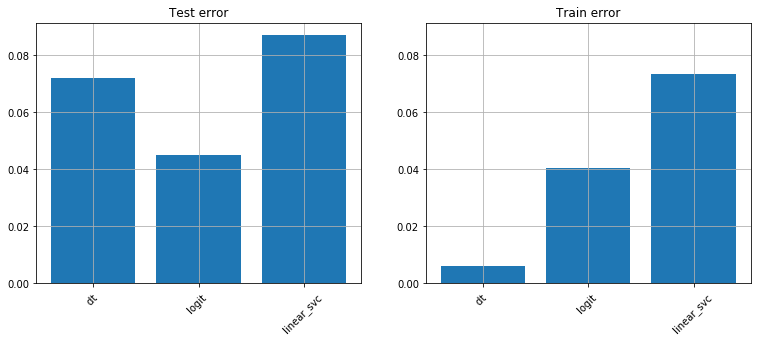

In [9]:
d.non_interactive(**data)

Como ya tienen un comportamiento muy bueno, no usaremos para nada PCA

## Sampler con los modelos simples

In [10]:
feature_range = (30, 800)

#### DT

In [11]:
data = {
    'dts_name': testing_dataset,
    'dts_size': 1000,
    'features_range': feature_range,
    'rbfsampler_gamma': 0.2,
    'nystroem_gamma': 0.2,
    'hparams': {
        'dt': {
            'max_depth': 100,
            'min_samples_split': 3,
            'min_samples_leaf': 1,
            'min_weight_fraction_leaf': 0.0,
            'max_leaf_nodes': 1000,
            'min_impurity_decrease': 0.0
        },
        'logit': {'C': 1000},
        'linearsvc': {'C': 5}
    },
    'models': [
        {'model_name': 'dt',
         'sampler_name': 'identity',
         'box_type': 'none',
         'n_estim': None,
         'pca': False,
         'pca_first': False
        },
        {'model_name': 'dt',
         'sampler_name': 'rbf',
         'box_type': 'none',
         'n_estim': None,
         'pca': False,
         'pca_first': False
        }
    ]
}

# Demo genérica


- Dataset: **segment**
- Size: **1000**
        

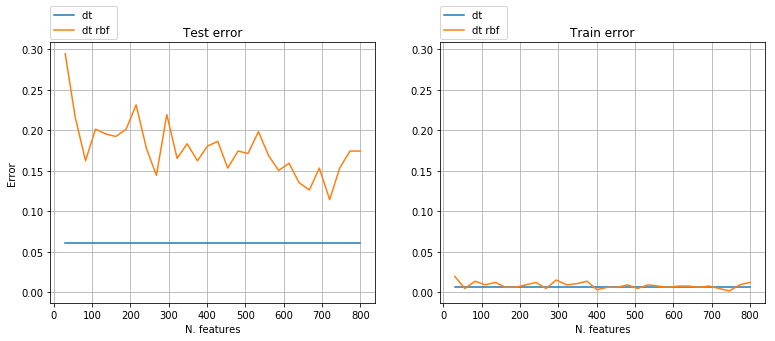

In [12]:
d.non_interactive(**data)

#### Logit

In [13]:
data = {
    'dts_name': testing_dataset,
    'dts_size': 1000,
    'features_range': feature_range,
    'rbfsampler_gamma': 0.2,
    'nystroem_gamma': 0.2,
    'hparams': {
        'dt': {
            'max_depth': 100,
            'min_samples_split': 3,
            'min_samples_leaf': 1,
            'min_weight_fraction_leaf': 0.0,
            'max_leaf_nodes': 1000,
            'min_impurity_decrease': 0.0
        },
        'logit': {'C': 1000},
        'linearsvc': {'C': 5}
    },
    'models': [
        {'model_name': 'logit',
         'sampler_name': 'identity',
         'box_type': 'none',
         'n_estim': None,
         'pca': False,
         'pca_first': False
        },
        {'model_name': 'logit',
         'sampler_name': 'rbf',
         'box_type': 'none',
         'n_estim': None,
         'pca': False,
         'pca_first': False
        }
    ]
}

# Demo genérica


- Dataset: **segment**
- Size: **1000**
        

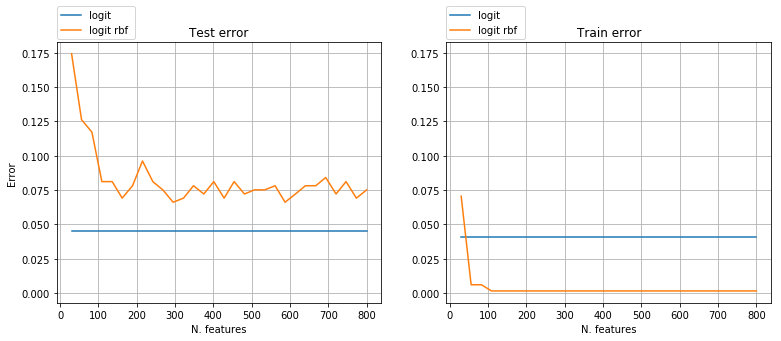

In [14]:
d.non_interactive(**data)

#### LinearSVC

In [15]:
data = {
    'dts_name': testing_dataset,
    'dts_size': 1000,
    'features_range': feature_range,
    'rbfsampler_gamma': 0.2,
    'nystroem_gamma': 0.2,
    'hparams': {
        'dt': {
            'max_depth': 100,
            'min_samples_split': 3,
            'min_samples_leaf': 1,
            'min_weight_fraction_leaf': 0.0,
            'max_leaf_nodes': 1000,
            'min_impurity_decrease': 0.0
        },
        'logit': {'C': 1000},
        'linearsvc': {'C': 5}
    },
    'models': [
        {'model_name': 'linear_svc',
         'sampler_name': 'identity',
         'box_type': 'none',
         'n_estim': None,
         'pca': False,
         'pca_first': False
        },
        {'model_name': 'linear_svc',
         'sampler_name': 'rbf',
         'box_type': 'none',
         'n_estim': None,
         'pca': False,
         'pca_first': False
        }
    ]
}

# Demo genérica


- Dataset: **segment**
- Size: **1000**
        

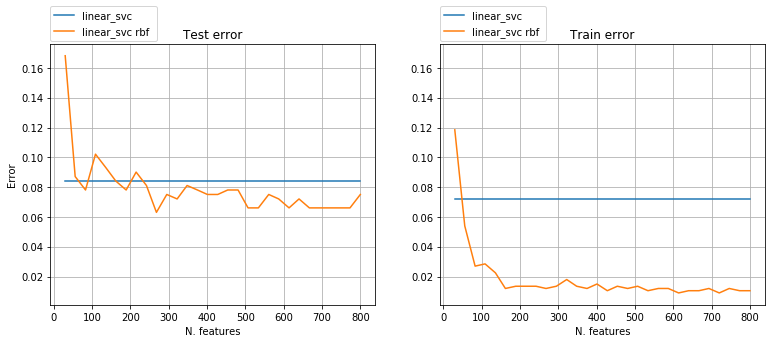

In [16]:
d.non_interactive(**data)

Podemos observar comportamientos distintos con cada uno de los modelos simples:
- DT parece que se beneficia de incrementar la cantidad de features, pero muy lentamente
- Logit mejora muy rápidamente hasta cierto punto, donde se estanca. El error que obtiene es
mayor que logit normal
- LinearSVM mejora rápidamente hasta que se estanca, y saca un accuracy mejor que LinearSVM normal

## ¿Qué gamma usar?

#### DT

In [17]:
d3 = Demo3()

In [19]:
data = {
    'dts_name': testing_dataset,
    'model_data':
        {'model_name': 'dt',
         'sampler_name': 'rbf',
         'pca_bool': False,
         'n_estim': None,
         'box_type': 'none'
        },
    'hparams': {
        'dt': dt_best_params,
        'logit': logit_best_params,
        'linearsvc': linear_svc_best_params,
    },
    'features_range': (30, 800)
}

# Diferencias entre los valores de gamma


- Model: **dt**
- Sampler: **rbf**
- Bagging: **none**
- N. estim.: **None**
- PCA: **False**
        

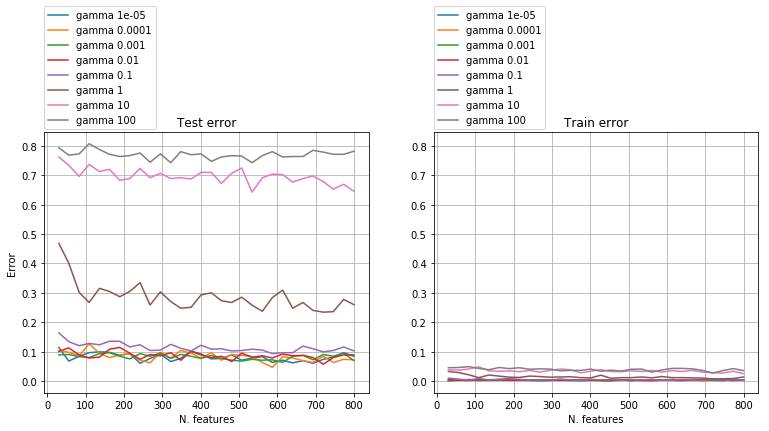

In [20]:
d3.non_interactive(**data)

En general, cuanto más pequeña la gamma, mejor

Un valor de **gamma** = 0.001 ya es óptimo

#### Logit

In [21]:
data = {
    'dts_name': testing_dataset,
    'model_data':
        {'model_name': 'logit',
         'sampler_name': 'rbf',
         'pca_bool': False,
         'n_estim': None,
         'box_type': 'none'
        },
    'hparams': {
        'dt': dt_best_params,
        'logit': logit_best_params,
        'linearsvc': linear_svc_best_params,
    },
    'features_range': (30, 800)
}

# Diferencias entre los valores de gamma


- Model: **logit**
- Sampler: **rbf**
- Bagging: **none**
- N. estim.: **None**
- PCA: **False**
        

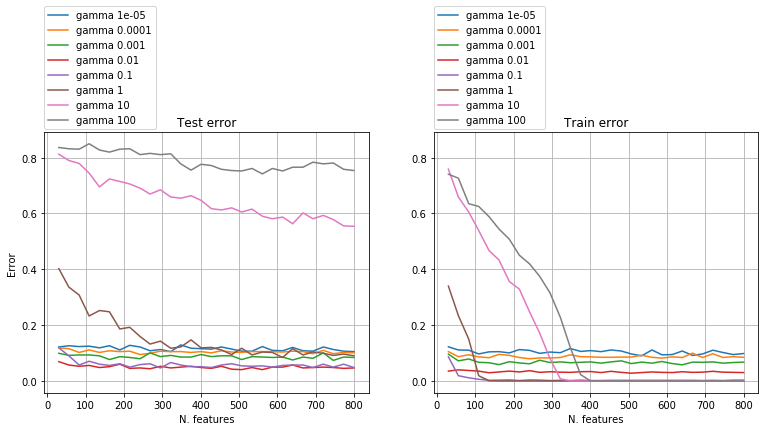

In [22]:
d3.non_interactive(**data)

Una valor de **gamma** = 0.01 parece ideal

#### LinearSVC

In [23]:
data = {
    'dts_name': testing_dataset,
    'model_data':
        {'model_name': 'linear_svc',
         'sampler_name': 'rbf',
         'pca_bool': False,
         'n_estim': None,
         'box_type': 'none'
        },
    'hparams': {
        'dt': dt_best_params,
        'logit': logit_best_params,
        'linearsvc': linear_svc_best_params,
    },
    'features_range': (30, 800)
}

# Diferencias entre los valores de gamma


- Model: **linear_svc**
- Sampler: **rbf**
- Bagging: **none**
- N. estim.: **None**
- PCA: **False**
        

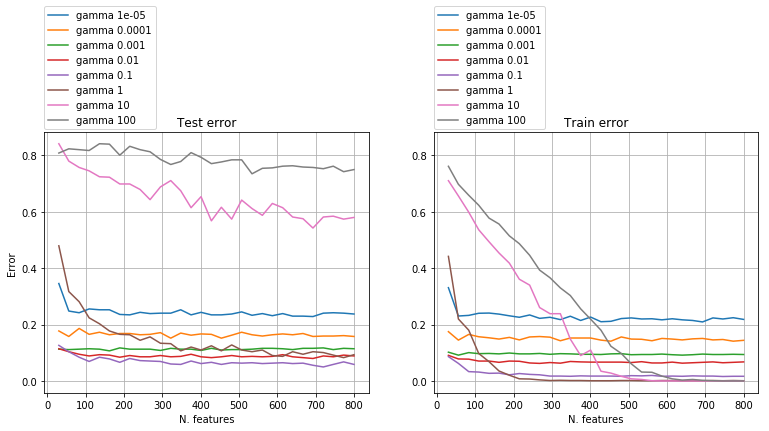

In [24]:
d3.non_interactive(**data)

Una valor de **gamma** = 0.1 parece ideal